### Name : Guruarunachalam. G
### Register Number : 20MID0068
### Campus : VIT - Vellore

<div style="text-align: center; font-size: 12px; color: blue">
    <h1>Applied Data Science</h1>
    <h2>Assignment Number - 03</h2>
</div>


### 1. Importing all the required Libraries :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

### 2. Load the dataset :

In [2]:
Housing = pd.read_csv("D:/Datasets/Housing.csv")

### Dataset analysis

In [3]:
int64_col = Housing.select_dtypes(include = 'int64')
print("Integer Columns: ", int64_col.columns.to_list())
float64_col = Housing.select_dtypes(include = 'float64')
print("Float Columns : ", float64_col.columns.to_list())
object_col = Housing.select_dtypes(include = 'object')
print("Object Columns : ", object_col.columns.to_list())
numeric_col = Housing.select_dtypes('number')
print("Numeric Columns : ", numeric_col.columns.to_list())

Integer Columns:  ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Float Columns :  []
Object Columns :  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
Numeric Columns :  ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


### 3. Visualisation :
       1. Univariate 
       2. Bivariate
       3. Multivariate

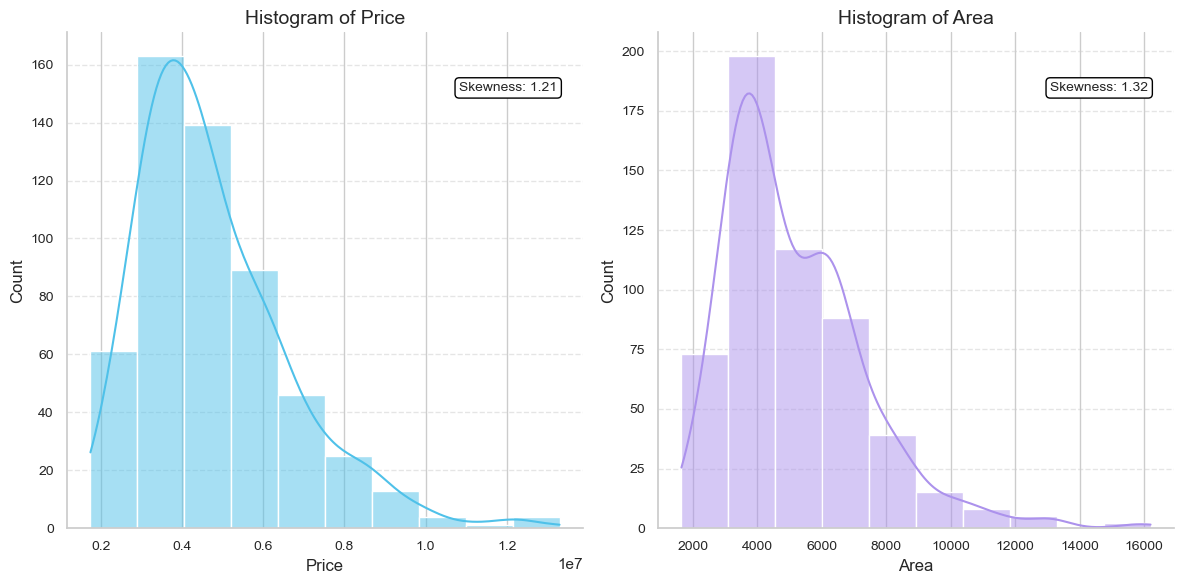

In [4]:
sns.set(style="whitegrid")

num_plots = 2
num_rows = 1
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
axes = axes.flatten()

colors = ['#4FC1E9', '#AC92EC']

for i, column in enumerate(['price', 'area']):
    ax = axes[i]
    sns.histplot(data=Housing, x=column, bins=10, stat='count', kde=True, color=colors[i], ax=ax)
    ax.set_xlabel(column.capitalize(), fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'Histogram of {column.capitalize()}', fontsize=14)
    ax.tick_params(axis='both', labelsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    skewness = skew(Housing[column].dropna())
    skewness_text = f'Skewness: {skewness:.2f}'
    ax.text(0.95, 0.9, skewness_text, transform=ax.transAxes, fontsize=10, horizontalalignment='right',
            verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

fig.tight_layout()
plt.show()

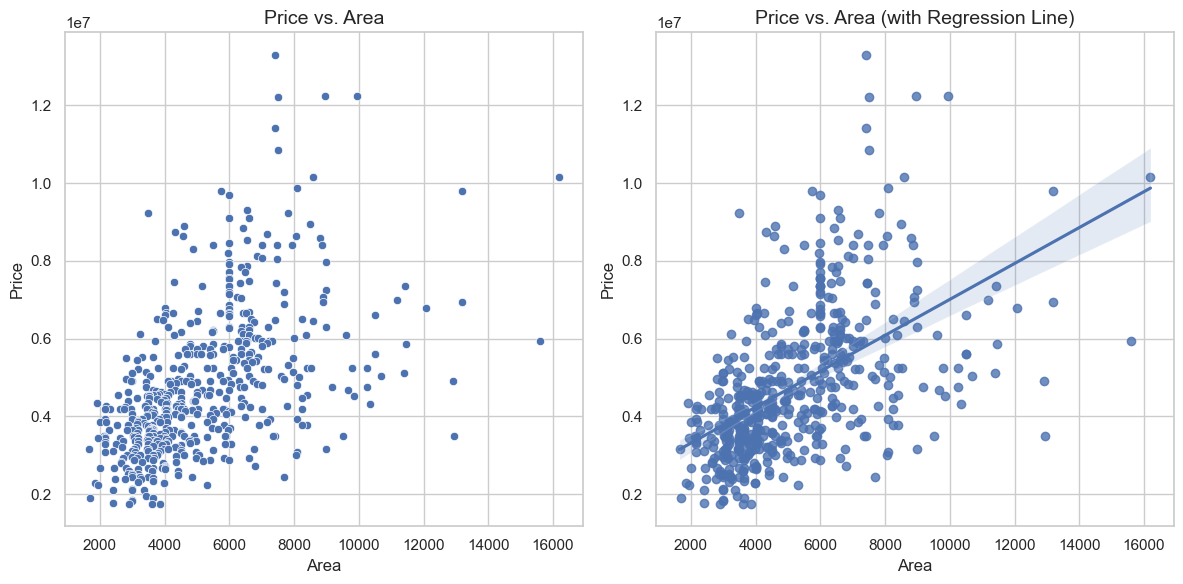

In [5]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot: Price vs. Area
sns.scatterplot(data=Housing, x='area', y='price', ax=axes[0])
axes[0].set_xlabel('Area', fontsize=12)
axes[0].set_ylabel('Price', fontsize=12)
axes[0].set_title('Price vs. Area', fontsize=14)

# Regression plot: Price vs. Area
sns.regplot(data=Housing, x='area', y='price', ax=axes[1])
axes[1].set_xlabel('Area', fontsize=12)
axes[1].set_ylabel('Price', fontsize=12)
axes[1].set_title('Price vs. Area (with Regression Line)', fontsize=14)

plt.tight_layout()
plt.show()

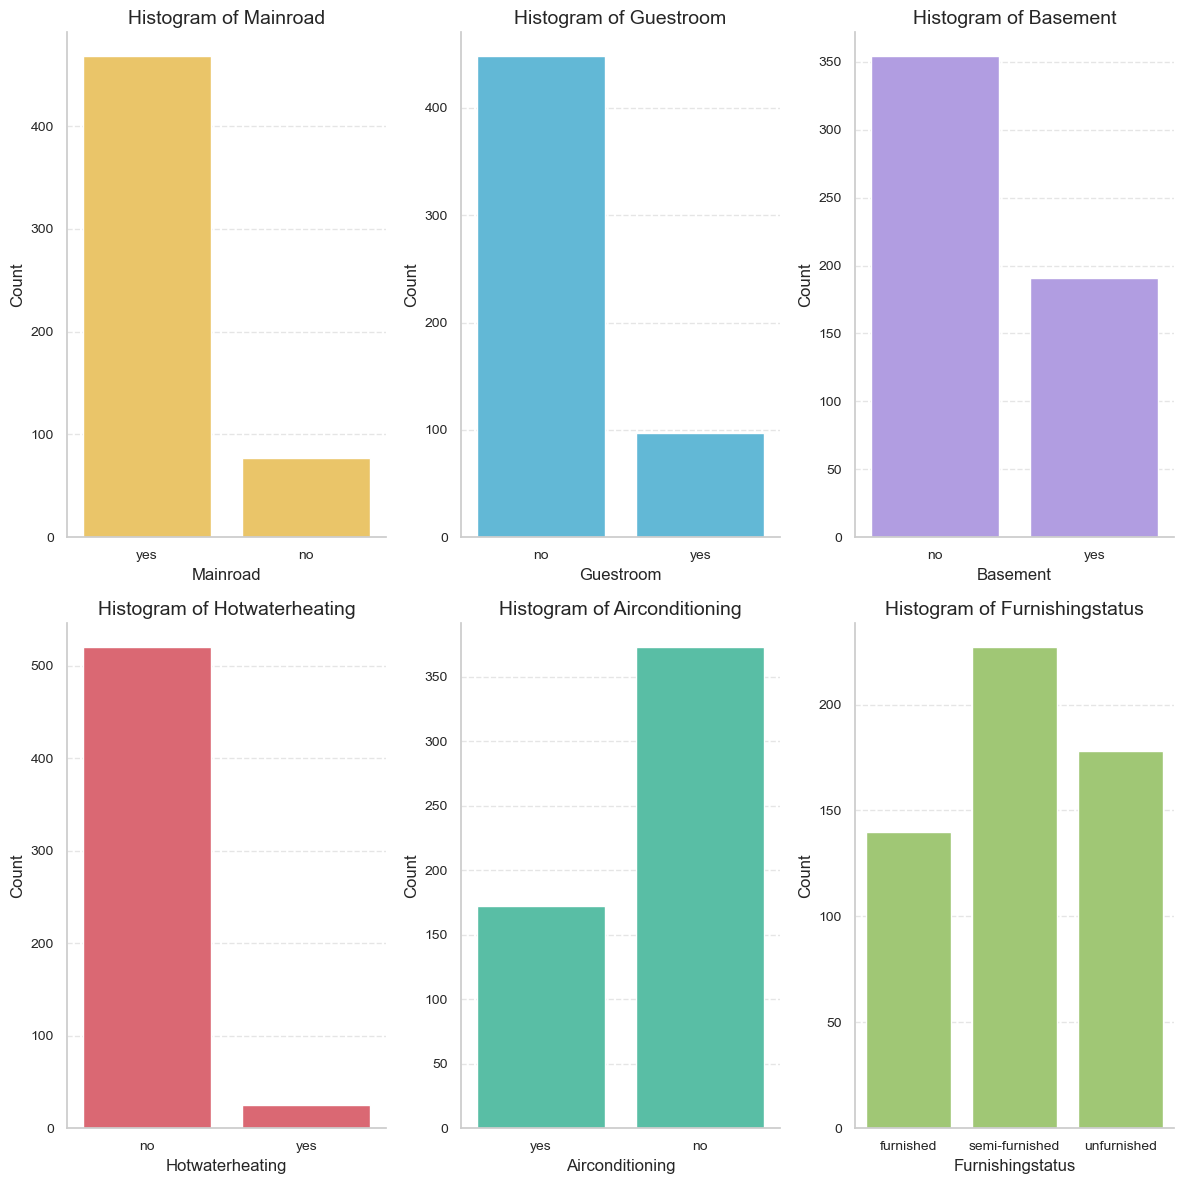

In [6]:
num_plots = len(object_col)
num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
axes = axes.flatten()

colors = ['#FFCE54', '#4FC1E9', '#AC92EC', '#ED5564', '#48CFAD', '#A0D468']

for i, column in enumerate(object_col):
    if i < num_rows * num_cols:
        ax = axes[i]
        sns.countplot(data=Housing, x=column, ax=ax, palette=[colors[i]])
        ax.set_xlabel(column.capitalize(), fontsize=12)
        ax.set_ylabel('Count', fontsize=12)
        ax.set_title(f'Histogram of {column.capitalize()}', fontsize=14)
        ax.tick_params(axis='both', labelsize=10)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(axis='y', linestyle='--', alpha=0.5)
    else:
        break

fig.tight_layout()
plt.show()

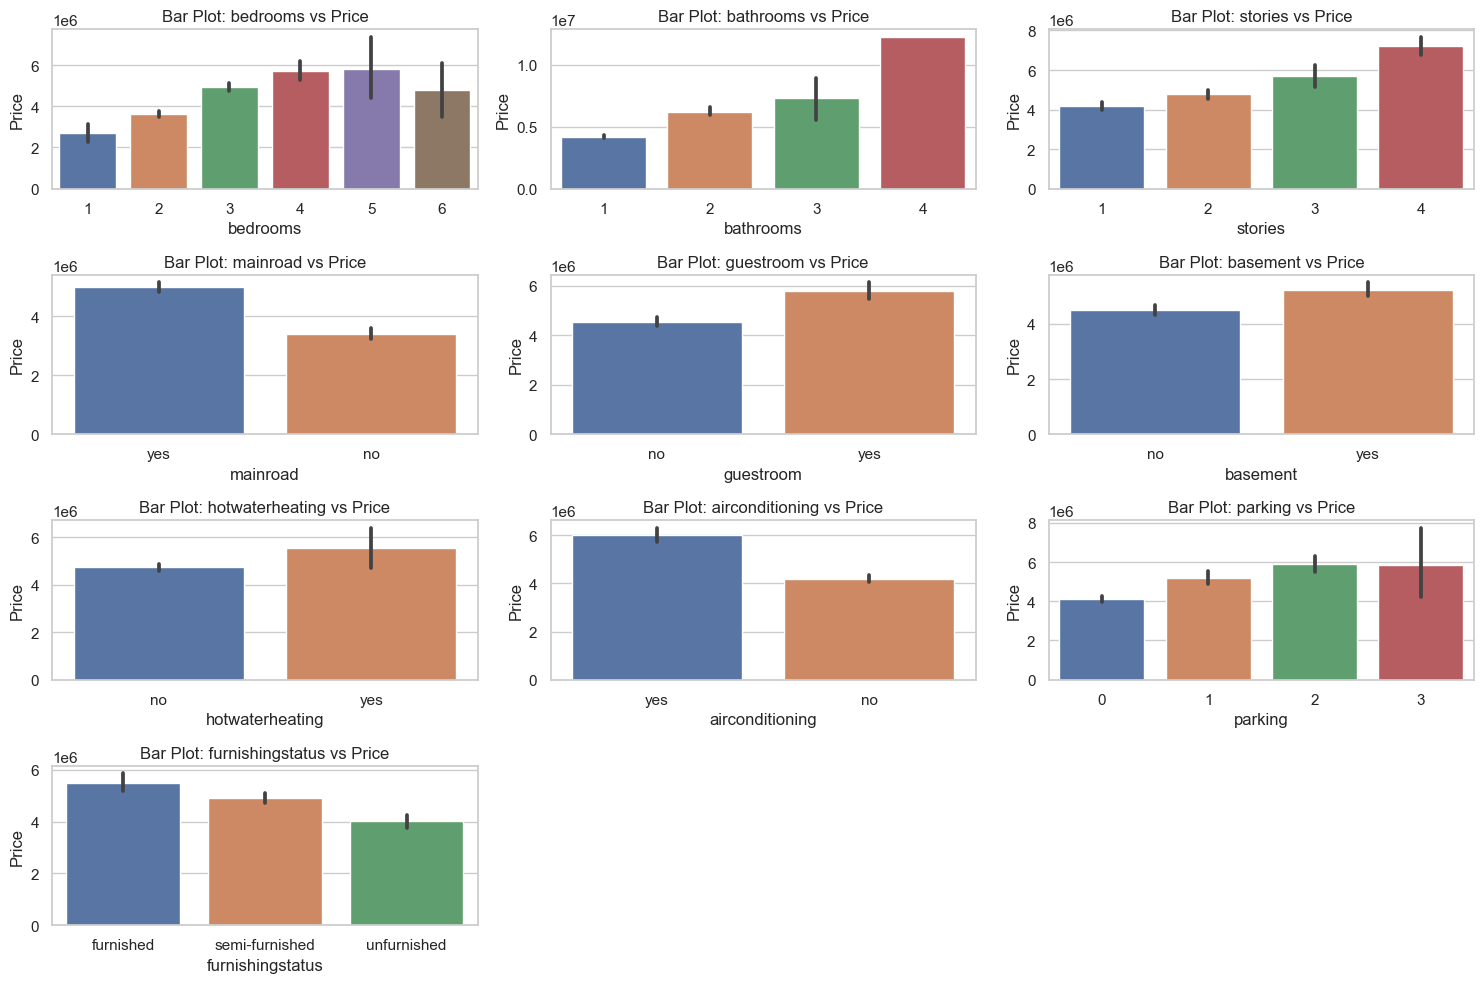

In [7]:
attributes = ['bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'furnishingstatus']
num_plots = len(attributes)
num_cols = 3  
num_rows = (num_plots + num_cols - 1) // num_cols  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
if num_plots > 1:
    axes = axes.flatten()
for i, attribute in enumerate(attributes):
    ax = axes[i] 
    sns.barplot(x=attribute, y='price', data=Housing, ax=ax)
    ax.set_xlabel(attribute)
    ax.set_ylabel('Price')
    ax.set_title(f'Bar Plot: {attribute} vs Price')

for j in range(num_plots, len(axes)):
    axes[j].axis('off')

plt.tight_layout() 
plt.show()

Can say that every attribute is equally participated in determining price, so can't pick a specific attribute and say that it is the most determining, but on comparing barplots and histograms inferences, there are more amount of "no" on comparing to "yes", so barplot's inference is way more abstractive than it really looks, it will show "yes" as more but it's an abstract that yes is determinining the price but the "yes" count is way more lower than "no" in many attributes(except "mainroad").

Text(0.5, 1.0, 'Correlation between features')

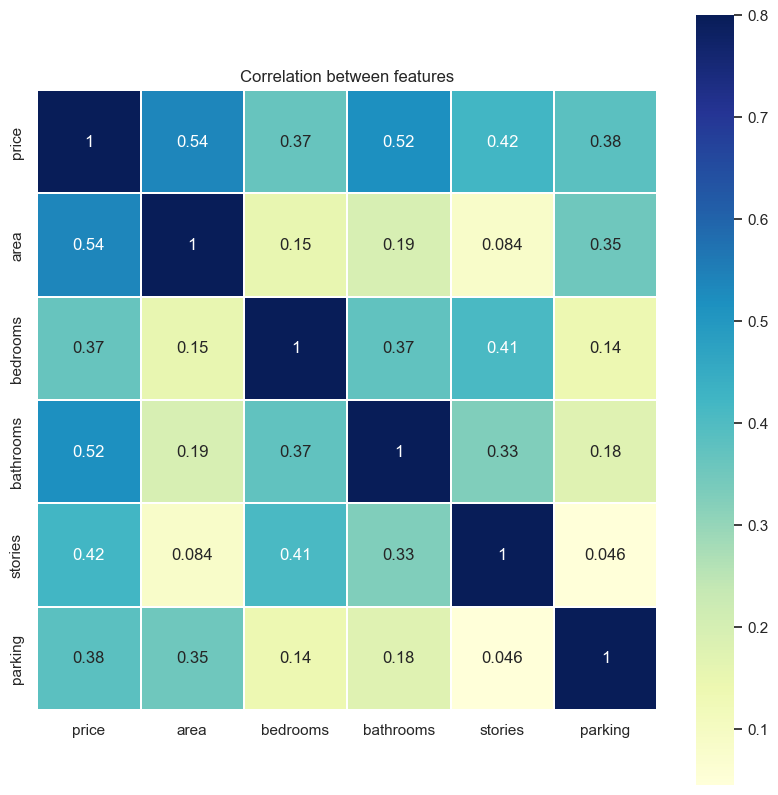

In [8]:
corr=numeric_col.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')

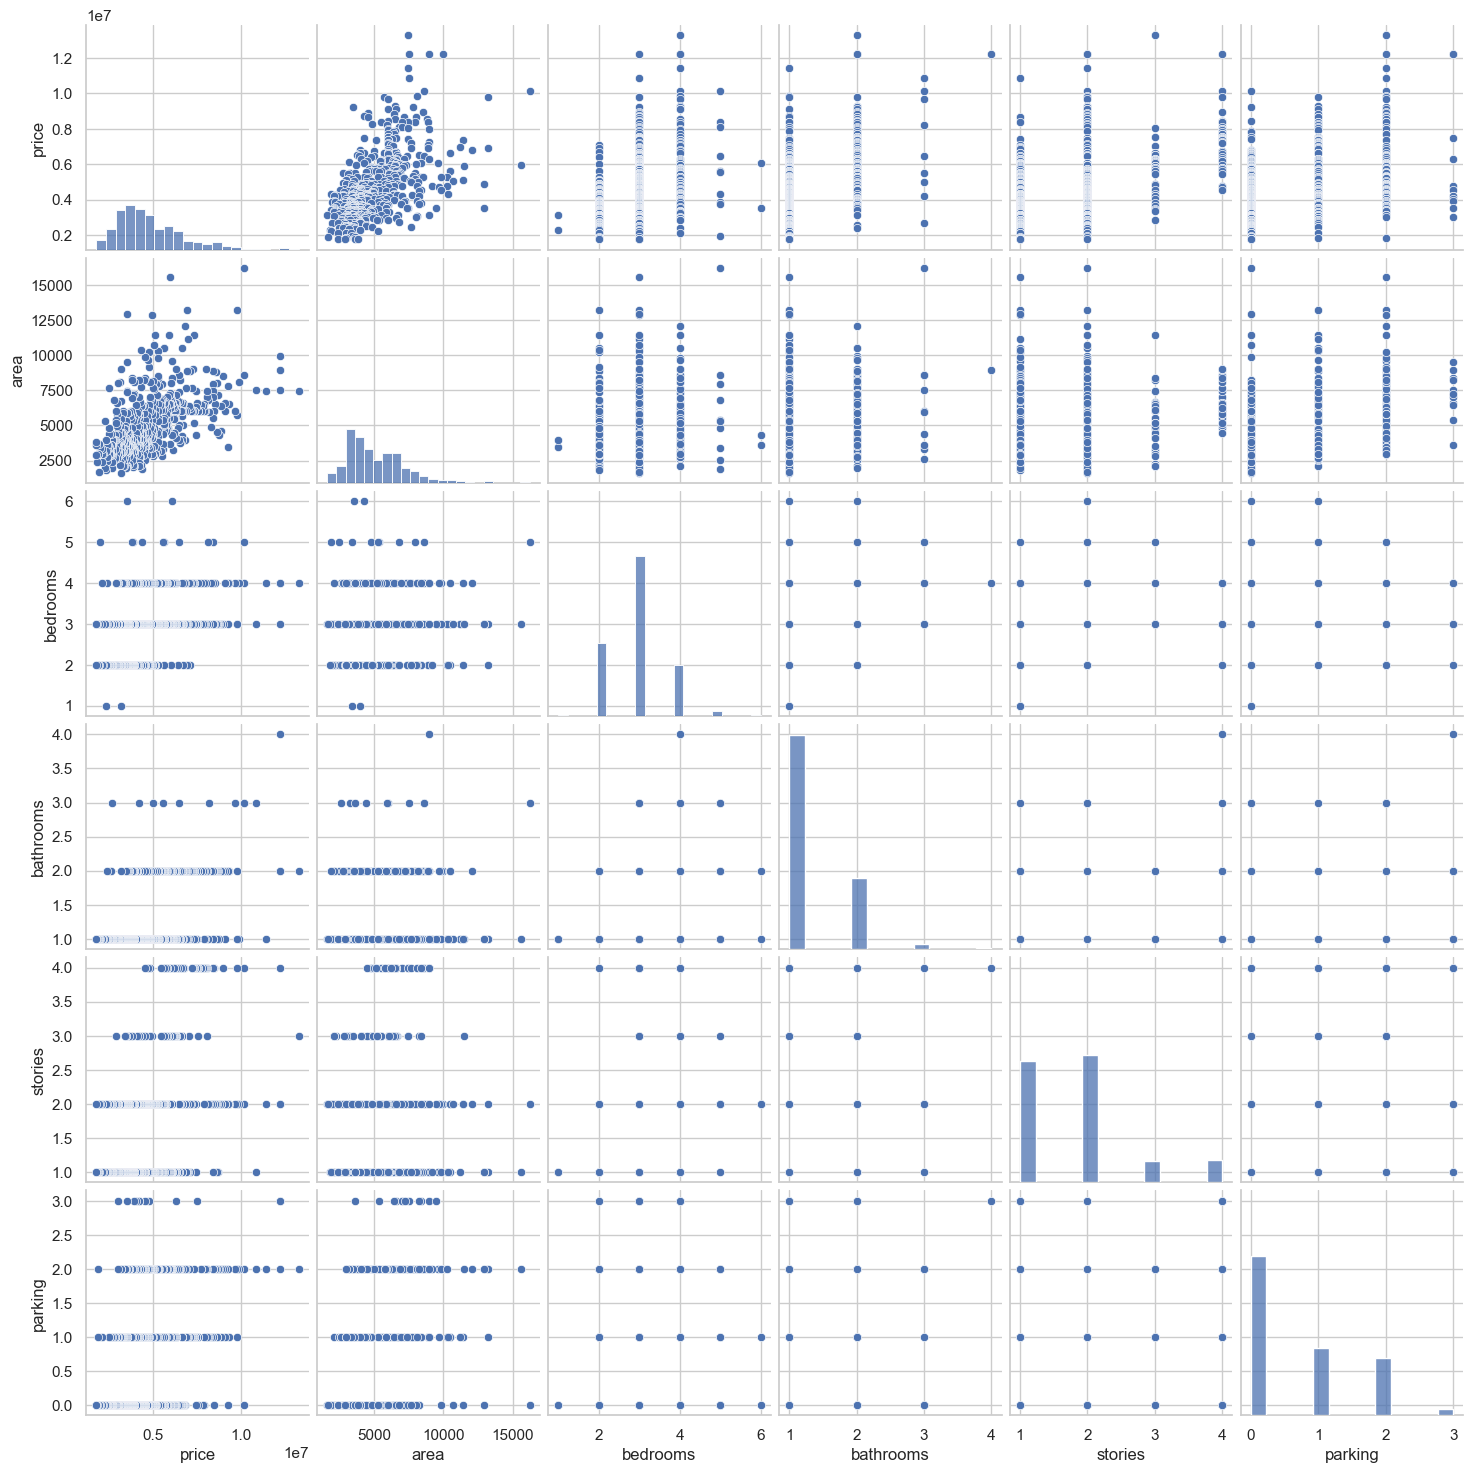

In [9]:
sns.pairplot(Housing)

### 4. Descriptive Statistics:

In [10]:
Housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### 5. Checking for Missing values and dealing with them.

In [11]:
null_counts = Housing.isnull().sum()
total_counts = Housing.count()
dict_1 = {'Total Count' : total_counts, "Null Count" : null_counts}
null_table = pd.DataFrame(dict_1)
null_table.index.name = "Column Names"
print(null_table)

                  Total Count  Null Count
Column Names                             
price                     545           0
area                      545           0
bedrooms                  545           0
bathrooms                 545           0
stories                   545           0
mainroad                  545           0
guestroom                 545           0
basement                  545           0
hotwaterheating           545           0
airconditioning           545           0
parking                   545           0
furnishingstatus          545           0


### 6. Outlier detection and removing them :

Text(0.5, 1.0, 'Box Plot - Area')

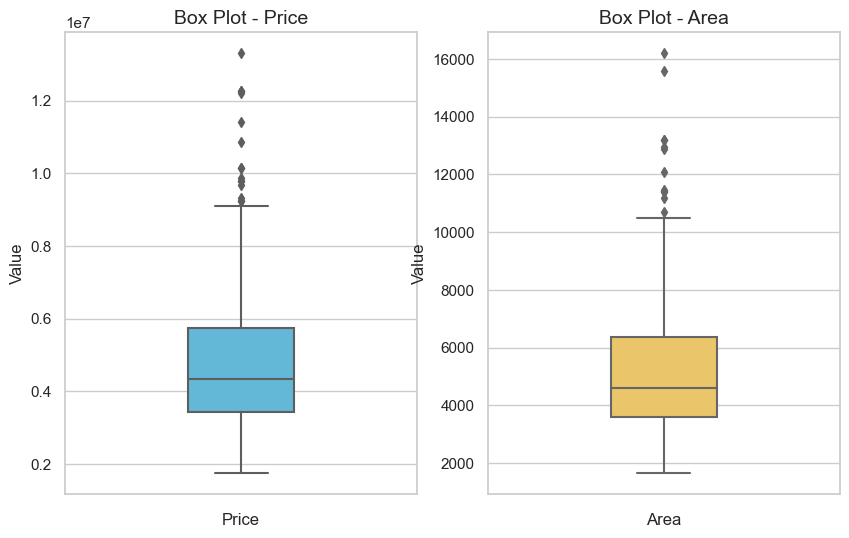

In [12]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=Housing, y='price', color='#4FC1E9', width=0.3)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Box Plot - Price', fontsize=14)

plt.subplot(1, 2, 2)
sns.boxplot(data=Housing, y='area', color='#FFCE54', width=0.3)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Box Plot - Area', fontsize=14)

In [13]:
Q1 = Housing.price.quantile(0.25)
Q3 = Housing.price.quantile(0.75)
IQR = Q3 - Q1
Housing = Housing[(Housing.price >= Q1 - 1.5*IQR) & (Housing.price <= Q3 + 1.5*IQR)]
Q1 = Housing.area.quantile(0.25)
Q3 = Housing.area.quantile(0.75)
IQR = Q3 - Q1
Housing = Housing[(Housing.area >= Q1 - 1.5*IQR) & (Housing.area <= Q3 + 1.5*IQR)]

Text(0.5, 1.0, 'Box Plot - Area')

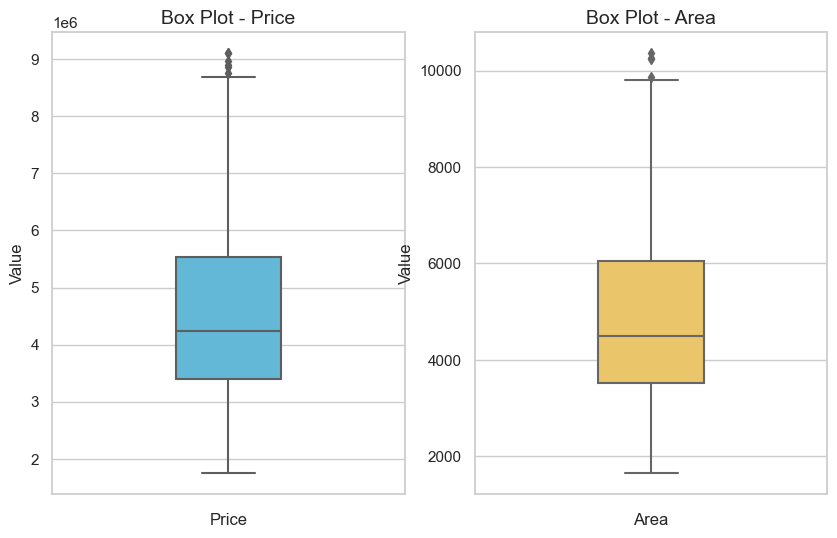

In [14]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=Housing, y='price', color='#4FC1E9', width=0.3)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Box Plot - Price', fontsize=14)

plt.subplot(1, 2, 2)
sns.boxplot(data=Housing, y='area', color='#FFCE54', width=0.3)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Box Plot - Area', fontsize=14)

### 7. Performing encoding for the required columns :

In [15]:
furnishstatus = pd.get_dummies(Housing['furnishingstatus'])
furnishstatus = pd.get_dummies(Housing['furnishingstatus'], drop_first = True)
Housing = pd.concat([Housing, furnishstatus], axis = 1)
Housing.drop('furnishingstatus', axis = 1, inplace = True)

In [16]:
Housing["mainroad"] = Housing["mainroad"].map({"yes": 1, "no": 0})
Housing["guestroom"] = Housing["guestroom"].map({"yes": 1, "no": 0})
Housing["basement"] = Housing["basement"].map({"yes": 1, "no": 0})
Housing["hotwaterheating"] = Housing["hotwaterheating"].map({"yes": 1, "no": 0})
Housing["airconditioning"] = Housing["airconditioning"].map({"yes": 1, "no": 0})

### 8. Split the data :

In [17]:
X = Housing.drop("price", axis = 1)
y = Housing["price"]

### 9. Splitting into training and test data :

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)


### 10. Performing Required Scaling procedures :

In [19]:
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_train = pd.DataFrame(y_train)

C:\Users\GURU\AppData\Local\Temp\ipykernel_7068\496662580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_vars] = scaler.fit_transform(X_train[num_vars])


### 11. Performing RFE(Recursive Feature Elimination) to determine the relevant features

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
rfe = RFE(lin_reg, 11)             # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
col

D:\Anaconda_Software_2\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=11 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Index(['area', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'semi-furnished',
       'unfurnished'],
      dtype='object')

### 12. Building the model : 

In [21]:
X = Housing[['area', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'semi-furnished',
       'unfurnished']]
y = Housing["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
Lm = LinearRegression()

### 13. Training the model :

In [22]:
Lm.fit(X_train, y_train)


LinearRegression()

### 14. Testing the model :

R2 Score:  0.6720009937783629


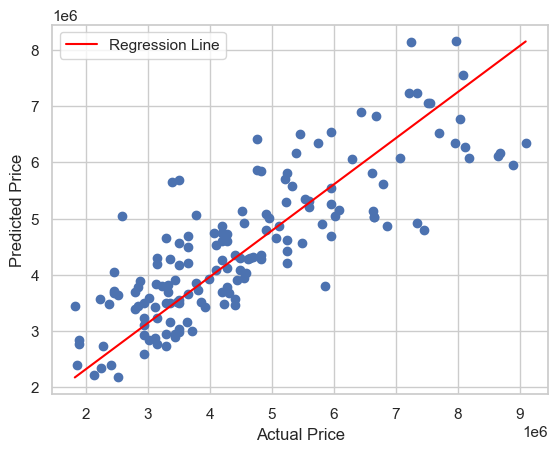

In [23]:
y_pred = Lm.predict(X_test)
print("R2 Score: ", r2_score(y_test,y_pred))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', label='Regression Line')
plt.legend()

plt.show()

### 15. Plots to inference the model's performance :

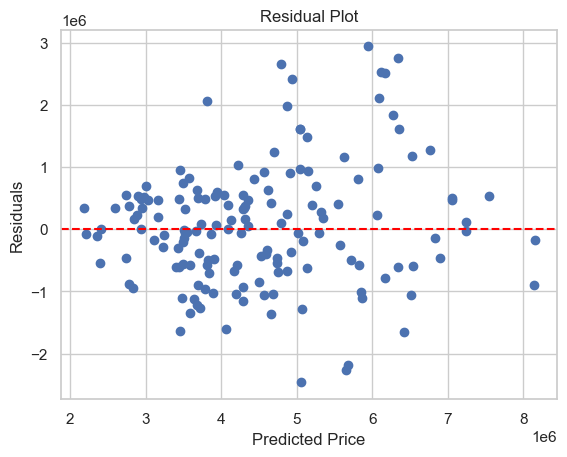

In [24]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In the residual plot, a good residual plot should exhibit randomness, constant spread, and residuals centered around zero.
We can see that more amount of outliers in the price prediction which are spreaded around other than zero, which depicts the model's perfromance is some what not better and need to do more preprocessing in the data to obtain a better model.

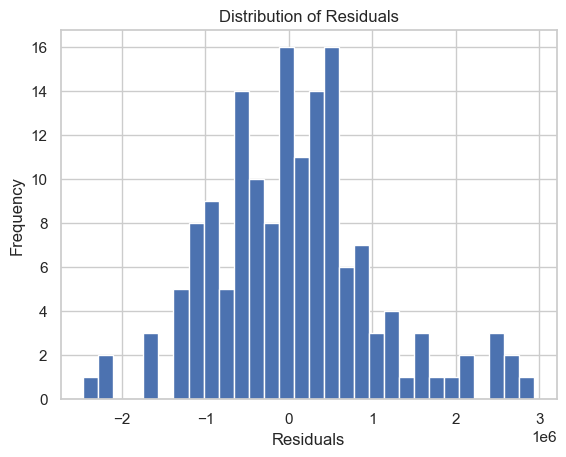

In [25]:
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

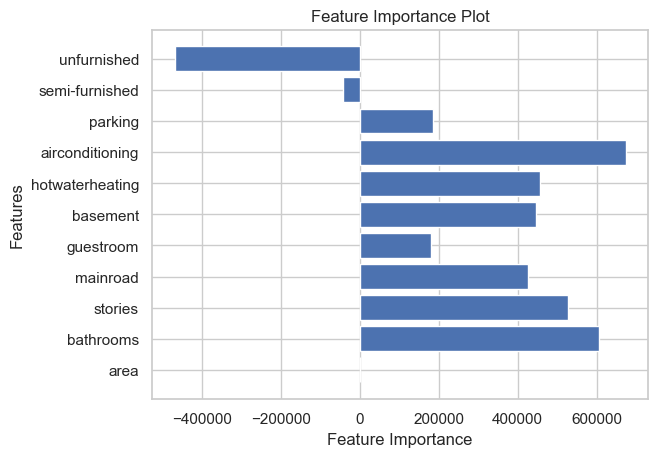

In [26]:
feature_importance = Lm.coef_
plt.barh(X_train.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

In [27]:
Table_of_inference = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': np.round(y_pred[:])})
Table_of_inference.index.name = "Test Case Number"
Table_of_inference

,Actual Values,Predicted Values
Test Case Number,,
244,4550000,4917228.0
287,4200000,4593960.0
166,5320000,5576647.0
176,5250000,5818086.0
282,4270000,3789815.0
...,...,...
314,4095000,4091974.0
36,8043000,6763249.0
298,4200000,4738374.0


In [35]:
y_test.dtype

dtype('int64')

In [46]:
print(y_test.to_list())

[4550000, 4200000, 5320000, 5250000, 4270000, 7525000, 3500000, 4403000, 4830000, 5950000, 3150000, 3360000, 3500000, 3115000, 2940000, 4956000, 7560000, 3143000, 2233000, 2940000, 5810000, 3500000, 4480000, 2940000, 2240000, 2450000, 5950000, 3465000, 3640000, 5740000, 5866000, 3640000, 5390000, 6293000, 3430000, 3500000, 8890000, 6685000, 3430000, 2870000, 6090000, 7350000, 8680000, 5075000, 3332000, 3500000, 3010000, 4410000, 3115000, 1890000, 5215000, 2408000, 4515000, 4200000, 2450000, 6790000, 2835000, 5229000, 2590000, 4760000, 4200000, 2520000, 7350000, 5250000, 3129000, 4900000, 5950000, 4200000, 3633000, 5495000, 4403000, 4235000, 5460000, 6440000, 3325000, 4445000, 4620000, 4095000, 7980000, 7245000, 5950000, 7210000, 4690000, 3010000, 5600000, 2380000, 3815000, 7962500, 3500000, 4760000, 8080940, 3290000, 4830000, 4060000, 2940000, 2800000, 4305000, 4550000, 9100000, 6615000, 8645000, 4830000, 4585000, 4900000, 3234000, 3710000, 3150000, 3395000, 5243000, 2940000, 5600000, 

In [48]:
y_pred.tolist()

[4917228.271588324,
 4593960.373671476,
 5576647.300695736,
 5818086.318322465,
 3789814.5724928654,
 7059369.325784402,
 3508646.34355797,
 4357263.365087898,
 5844784.952774694,
 6544294.812130684,
 2778559.487170559,
 4283955.234402759,
 3031950.2684188415,
 2887247.2049892093,
 2592954.7281897417,
 5016845.711994475,
 7059369.325784402,
 4292495.658193074,
 3580616.050589533,
 3106679.282460645,
 4909462.205552014,
 4563295.490984995,
 4308649.447795631,
 3231298.8053178405,
 2354345.018820772,
 3721650.172175852,
 5545535.390756322,
 3525195.707638918,
 3665926.9127774355,
 6344216.350815937,
 3807813.075899214,
 4684039.27856958,
 6171760.144121267,
 6058860.990483239,
 3905220.3238009093,
 5682584.560551763,
 5949276.683848919,
 6826641.065684363,
 2941892.6784585747,
 3890470.412843757,
 5147315.184182964,
 7239011.946200669,
 6168607.476698536,
 4660282.611076724,
 3823799.1957271406,
 2980147.502053967,
 3592261.934869547,
 3458375.103932765,
 3423200.103852234,
 2836078.5633